# Portfolio part 3 - Exploratory data analysis case study

## 1 - Introduction and background

Forecasting sales in retail segment is an important factor for planning and management decision making. Predicting demand is important for production planning, warehouse inventory, budgeting, human resource planning, etc.

There are inherent uncertainties in demand forecasting due to several variables involved including promotions, holidays, competitors, special events, etc. 

This portfolio focuses on preparing data (data wrangling and data cleaning) for data scientists to perform data modelling and demand forecasting of Rossman chain drugstore. The aim is to assess our undestanding of the data and ability to do data cleaning, data wrangling and data visualisation and some data filtering. Rossman  operates more than 3000 branches in seven European countries. 

Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. 

We are provided with historical sales data for 1,115 Rossmann stores in 2 CSV files:

**train.csv** - historical data including Sales.

**store.csv** - supplemental information about the stores.





## 2- Ethical consideration with regards to the datasets

In this section we investigate ethical consideration with regards to the datasets, especially with regards to accountability and data bias:

1 - *Have we studied and understood possible sources of bias in our data?*

In the data there is no mention of gender, age, social and economical status, etc. and we do not select data entries for the forecast and all data are treated equally. Furthermore, in the process of data preparation we will remove the outliers which are a known source of bias in data.

Therefore, we believe to the best of our knowledge the bias does no exist.


2 - *Have we anonymised data? *

Yes, there are no personal information included in the datasets which violate people's privacy and reveals their information to the public.

3 - *Do we sell personal data to the third parties?*

Datasets are available to the public but as mentioned above data is completely anonymous and no personal information are involved.

4 - *Do we ensure that the use of data does not lead to discrimination?*

Yes, as the data have not been selected and include all available data from across all Rossman stores, we believe the forecasting and data modelling won't lead to any discrimination.






## 3 - Variable explanation

Below is a list of the data fields in the datasets:

**Id** - an Id that represents a (Store, Date) duple within the test set

**Store** - a unique Id for each store

**Sales** - the turnover for any given day

**Customers** - the number of customers on a given day

**Open** - an indicator for whether the store was open: 0 = closed, 1 = open

**StateHoliday** - indicates a state holiday. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools

**StoreType** - differentiates between 4 different store models: a, b, c, d

**Assortment** - describes an assortment level: a = basic, b = extra, c = extended

**CompetitionDistance** - distance in meters to the nearest competitor store

**CompetitionOpenSince [Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened

**Promo** - indicates whether a store is running a promo on that day

**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

**Promo2Since [Year/Week]** - describes the year and calendar week when the store started participating in Promo2

**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

## 4 - Input

Now we input datasets from CSV files and store them in dataframes:

In [3]:
train = pd.read_csv("train.csv", low_memory = False)
store = pd.read_csv("store.csv", low_memory = False)


## 5 - Data summary

In [4]:
print("train dataset rows and culomns: ", train.shape)

train dataset rows and culomns:  (1017209, 9)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [6]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


We see that the train dataset which is sopposed to be used for predicting sales has 1017209 rows and 9 columns. there are no null rows in the dataset. We see that the date data type is object, so we need to convert its dtype to datatime.



In [7]:
print("store dataset rows and culomns: ", store.shape)

store dataset rows and culomns:  (1115, 10)


In [8]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [9]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## 6-1 - Merging of data sources

Now we merge two datasets using store culomn and only stores which exist in both datasets. Also we validate that the are no duplicates in the store culomn in store datasets:

In [10]:
merged_train = train.merge(store, how='inner', on="Store",validate="many_to_one")
merged_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

We see that there are several null rows in culomns 11-13 and 15-17 which need to be removed from the dataset later.

In [11]:
merged_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


## 6-2 - Converting date columns to DateTime 

Now we convert date culomn to datetime using the correct format and by replacing invalid dates with Nat:

In [12]:
dt_corrected = pd.to_datetime(merged_train["Date"],errors="coerce",format="%Y-%m-%d")



In [13]:
merged_train["Date"] = dt_corrected
merged_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

## 7-1 - Variable classification

 0   **Store**                      nominal       
 1   **DayOfWeek**                  ordinal         
 2   **Date**                       date       
 3   **Sales**                      continuous         
 4   **Customers**                  discrete         
 5   **Open**                       nominal        
 6   **Promo**                      nominal         
 7   **StateHoliday**               nominal        
 8   **SchoolHoliday**              nominal         
 9   **StoreType**                  nominal        
 10  **Assortment**                 ordinal    
 11  **CompetitionDistance**        continuous    
 12  **CompetitionOpenSinceMonth**  discrete      
 13  **CompetitionOpenSinceYear**   discrete       
 14  **Promo2**                     nominal       
 15  **Promo2SinceWeek**            discrete       
 16  **Promo2SinceYear**            discrete      
 17  **PromoInterval**              nominal       

## 7-2 - Summary statistics of the data

Here we use describe() method to get statistical data of the merged dataset.

In [14]:
merged_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


For example in the above table in the sales culomn the describe methods tells us there are 1017209 entries with a mean of 5773.819 and standard deviation of 3849.926  the lower percentile of data is qual to 3727, the 50 percentile of data is qual to 5744, the upper percentile of data is qual to  7856  and the maximum of data is qual to 41551.

In [15]:
merged_train.skew()

/var/folders/6r/0kkh8x7d6nsck_dj0hdd57rm0000gn/T/ipykernel_14533/3922604160.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merged_train.skew()


Store                       -0.000955
DayOfWeek                    0.001593
Sales                        0.641460
Customers                    1.598650
Open                        -1.758045
Promo                        0.487838
SchoolHoliday                1.677842
CompetitionDistance          2.928534
CompetitionOpenSinceMonth   -0.169862
CompetitionOpenSinceYear    -7.539515
Promo2                      -0.002255
Promo2SinceWeek              0.104528
Promo2SinceYear             -0.120060
dtype: float64

In [16]:
merged_train.kurtosis()

/var/folders/6r/0kkh8x7d6nsck_dj0hdd57rm0000gn/T/ipykernel_14533/2170605026.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merged_train.kurtosis()


Store                         -1.200524
DayOfWeek                     -1.246873
Sales                          1.778375
Customers                      7.091773
Open                           1.090723
Promo                         -1.762018
SchoolHoliday                  0.815154
CompetitionDistance           13.000022
CompetitionOpenSinceMonth     -1.248357
CompetitionOpenSinceYear     121.934675
Promo2                        -1.999999
Promo2SinceWeek               -1.369929
Promo2SinceYear               -1.040662
dtype: float64

We can see that CompetitionOpenSinceYear variable has a very high positive kurtosis. This indicates the likelihood of heavy tails with outliers that are possibly extreme. If we look into the describe table we can see we have minimum as year 1900 which seems to be incorrect.

## 8 - Data cleaning and visualisation

Let's first check entries with zero sales:

In [17]:
zero_sales = merged_train[(merged_train.Sales == 0)]
zero_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172871 entries, 5 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      172871 non-null  int64         
 1   DayOfWeek                  172871 non-null  int64         
 2   Date                       172871 non-null  datetime64[ns]
 3   Sales                      172871 non-null  int64         
 4   Customers                  172871 non-null  int64         
 5   Open                       172871 non-null  int64         
 6   Promo                      172871 non-null  int64         
 7   StateHoliday               172871 non-null  object        
 8   SchoolHoliday              172871 non-null  int64         
 9   StoreType                  172871 non-null  object        
 10  Assortment                 172871 non-null  object        
 11  CompetitionDistance        172415 non-null  float64

We see that there are 172871 rows with no sales! We should remove them:

In [18]:
merged_train = merged_train[(merged_train['Sales'] != 0)]
merged_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017207
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844338 non-null  int64         
 1   DayOfWeek                  844338 non-null  int64         
 2   Date                       844338 non-null  datetime64[ns]
 3   Sales                      844338 non-null  int64         
 4   Customers                  844338 non-null  int64         
 5   Open                       844338 non-null  int64         
 6   Promo                      844338 non-null  int64         
 7   StateHoliday               844338 non-null  object        
 8   SchoolHoliday              844338 non-null  int64         
 9   StoreType                  844338 non-null  object        
 10  Assortment                 844338 non-null  object        
 11  CompetitionDistance        842152 non-null  float64

Now we drop the Open culomn as it is unnecessary as any store with non-zero sales has certainly been open:

In [19]:
merged_train = merged_train.drop(columns = "Open")
merged_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017207
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844338 non-null  int64         
 1   DayOfWeek                  844338 non-null  int64         
 2   Date                       844338 non-null  datetime64[ns]
 3   Sales                      844338 non-null  int64         
 4   Customers                  844338 non-null  int64         
 5   Promo                      844338 non-null  int64         
 6   StateHoliday               844338 non-null  object        
 7   SchoolHoliday              844338 non-null  int64         
 8   StoreType                  844338 non-null  object        
 9   Assortment                 844338 non-null  object        
 10  CompetitionDistance        842152 non-null  float64       
 11  CompetitionOpenSinceMonth  575738 non-null  float64

Now we chack for missing values:

In [20]:
merged_train.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2186
CompetitionOpenSinceMonth    268600
CompetitionOpenSinceYear     268600
Promo2                            0
Promo2SinceWeek              423292
Promo2SinceYear              423292
PromoInterval                423292
dtype: int64

We see that we still have missing values in some columns.

Next we replace NaN values in the competition distance field with the median distance:

In [21]:
merged_train['CompetitionDistance'].fillna(merged_train['CompetitionDistance'].median(), inplace = True)
merged_train.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth    268600
CompetitionOpenSinceYear     268600
Promo2                            0
Promo2SinceWeek              423292
Promo2SinceYear              423292
PromoInterval                423292
dtype: int64

In [22]:
merged_train[(merged_train['Promo2'] == 0)] 
             


,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016260,1114,1,2013-01-07,21237,2962,1,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1016262,1114,6,2013-01-05,18856,3065,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1016263,1114,5,2013-01-04,18371,3036,0,0,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1016264,1114,4,2013-01-03,18463,3211,0,0,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


We see that all NaN vlaues for Promo2SinceWeek and Promo2SinceYear are for stores with no Promo2, therefore we will replace NaN values with zero.

Now we replace all other NaN values with zero:

In [23]:
merged_train.fillna(0, inplace = True)
merged_train.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Now we check for any duplicate rows:

In [24]:
drop_multiple = merged_train.drop_duplicates(["Store","Date"],keep="first")
drop_multiple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017207
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844338 non-null  int64         
 1   DayOfWeek                  844338 non-null  int64         
 2   Date                       844338 non-null  datetime64[ns]
 3   Sales                      844338 non-null  int64         
 4   Customers                  844338 non-null  int64         
 5   Promo                      844338 non-null  int64         
 6   StateHoliday               844338 non-null  object        
 7   SchoolHoliday              844338 non-null  int64         
 8   StoreType                  844338 non-null  object        
 9   Assortment                 844338 non-null  object        
 10  CompetitionDistance        844338 non-null  float64       
 11  CompetitionOpenSinceMonth  844338 non-null  float64

We see that there wereno duplicate rows.

### Handling outliers

Let’s start with a box plot of our DataFrame.


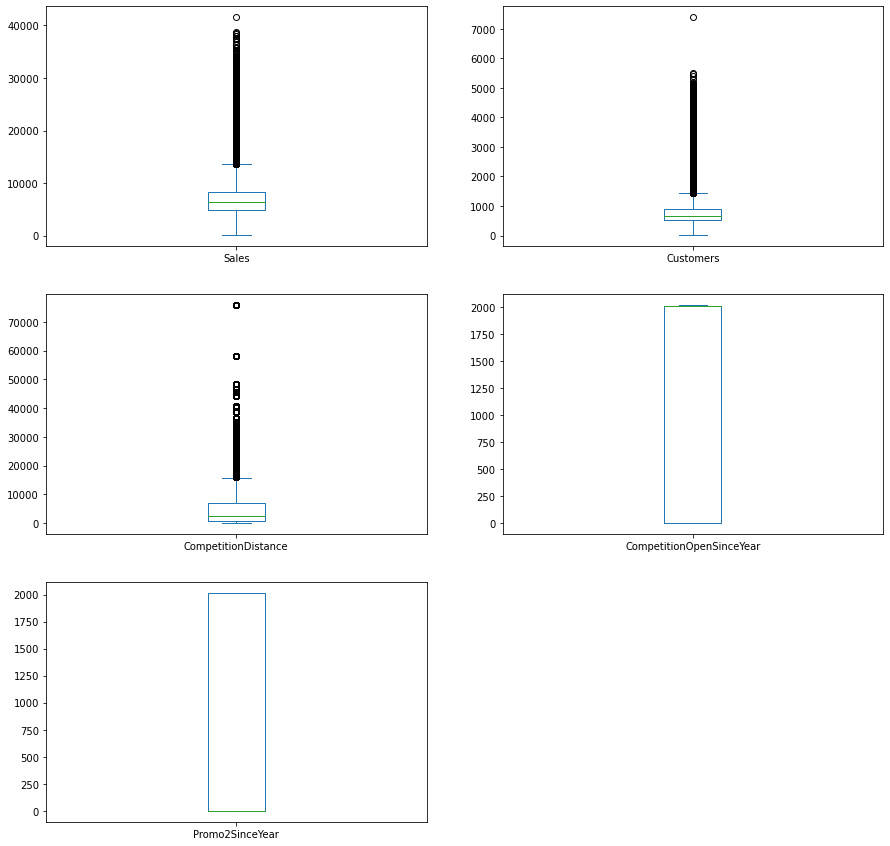

In [25]:
merged_train.plot(y=["Sales","Customers","CompetitionDistance",
                 "CompetitionOpenSinceYear","Promo2SinceYear","PromoInterval"],
              layout = (3,2), subplots=True, kind="box", figsize=(15,15))
plt.show()

We can see that we have some columns with outlier. We use the function caluclate_outlier to calculate the lower and upper ranges for our outliers and then filter accordingly:

In [26]:
def calculate_outlier(df,column):
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 +b 1.5 * IQR
    return lower, upper

SyntaxError: invalid syntax (488650080.py, line 6)

In [ ]:
col = "Sales"
lower_ins,upper_ins = calculate_outlier(merged_train,col)
print(lower_ins,upper_ins)
merged_train[(merged_train[col]>upper_ins) | (merged_train[col]<lower_ins)].count()

We impute the outliers with the upper range value:

In [ ]:
merged_train.loc[(merged_train[col]>upper_ins) | (merged_train[col]<lower_ins),col] = upper_ins
merged_train[(merged_train[col]>upper_ins) | (merged_train[col]<lower_ins)].count()

Now we do the same thing for other culomns of interest:

In [ ]:
col = "Customers"
lower_ins,upper_ins = calculate_outlier(merged_train,col)
print(lower_ins,upper_ins)
merged_train[(merged_train[col]>upper_ins) | (merged_train[col]<lower_ins)].count()

In [ ]:
merged_train.loc[(merged_train[col]>upper_ins) | (merged_train[col]<lower_ins),col] = upper_ins
merged_train[(merged_train[col]>upper_ins) | (merged_train[col]<lower_ins)].count()

In [ ]:
col = "CompetitionDistance"
lower_ins,upper_ins = calculate_outlier(merged_train,col)
print(lower_ins,upper_ins)
merged_train[(merged_train[col]>upper_ins) | (merged_train[col]<lower_ins)].count()

In [ ]:
merged_train.loc[(merged_train[col]>upper_ins) | (merged_train[col]<lower_ins),col] = upper_ins
merged_train[(merged_train[col]>upper_ins) | (merged_train[col]<lower_ins)].count()

In [ ]:
col = "CompetitionOpenSinceYear"
lower_ins,upper_ins = calculate_outlier(merged_train,col)
print(lower_ins,upper_ins)
merged_train[(merged_train[col]>upper_ins) | (merged_train[col]<lower_ins)].count()

In [ ]:
merged_train.loc[(merged_train[col]>upper_ins) | (merged_train[col]<lower_ins),col] = upper_ins
merged_train[(merged_train[col]>upper_ins) | (merged_train[col]<lower_ins)].count()

## 9 - Exploratory insights and visualisation

After cleaning data we summurise data again:

In [27]:
merged_train.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000
mean,558.421374,3.520350,6955.959134,762.777166,0.446356,0.193578,5450.031907,4.926482,1369.692738,0.498670,11.596159,1003.201259
std,321.730861,1.723712,3103.815515,401.194153,0.497114,0.395102,7801.087197,4.283634,935.556484,0.499999,15.308101,1005.874685
min,1.000000,1.000000,46.000000,8.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000,710.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000,2320.000000,4.000000,2006.000000,0.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000,6880.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [28]:
merged_train.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### Sales per DayOfWeek with and without Promo

In [38]:
SalesPerDayOfWeek_pivot = pd.pivot_table(merged_train,index="DayOfWeek", columns="Promo", values="Sales", aggfunc=np.mean)
SalesPerDayOfWeek_pivot

Promo,0,1
DayOfWeek,,
1,6222.727829,9772.910890
2,5716.412127,8277.630871
3,5617.729043,7685.682535
4,5750.882664,7598.788372
5,6344.411832,7744.388208
6,5875.084935,NaN
7,8224.723908,NaN


We can clearly see that In case of no promotion, Sales tend to peak on Sunday.  Whereas, stores that run the promotion make most of the Sales on Monday. Promo2 seems to have no effect on sales.

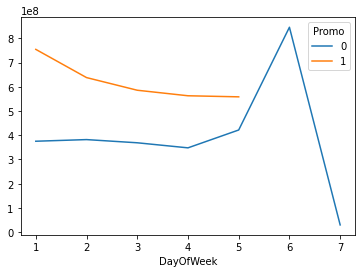

In [36]:
SalesPerDayOfWeek_pivot.plot(figsize=(6,4))
plt.show()

## 10 - Conclusion

In this potfolio we merged train and store datasets and came up with a 1017208 rows and 18 columns dataset. then we removed unnecessary culomns and rows with zero sales. Finaly we saw the effect of promo on sales per days of the week. We see that Promo 2 has no significant benefit for the stores.

## 11 - References

Rossmann Store Sales, Forecast sales using store, promotion, and competitor data.

URL: https://www.kaggle.com/competitions/rossmann-store-sales/data

Access date: 4-Apr-2022